In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

#Imports the provided datasets
mouse_metadata = os.path.join("Pymaceuticals","data","Mouse_metadata.csv")
study_results = os.path.join("Pymaceuticals","data","Study_results.csv")

#Reads the CSV Files
mouse_data = pd.read_csv(mouse_metadata)
results = pd.read_csv(study_results)

#Merges the two datasets
data = pd.merge(left = results, right = mouse_data, on = "Mouse ID", how = 'left')
data = data[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Calculates the number of unique mice IDs
unique_mice = data['Mouse ID'].nunique()
print(unique_mice)

249


In [3]:
#Gets the mouse ID and timepoint combination which is a duplicate
duplicate_tp = data[data.duplicated(['Mouse ID','Timepoint'], keep = False)]
duplicate_tp = duplicate_tp['Mouse ID'].unique()
duplicate_tp

array(['g989'], dtype=object)

In [4]:
#Gets all the data on that mouse
duplicate_mdata = data[data['Mouse ID'] == 'g989']
duplicate_mdata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Cleans the data and rids it of the duplicate mouse
clean_data = data[~data['Mouse ID'].isin(duplicate_tp)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#Verifies that the mouse is indeed dropped
print(clean_data['Mouse ID'].nunique())

248


In [7]:
##SUMMARY STATS
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats.columns = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.',
                         'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar Plots and Charts

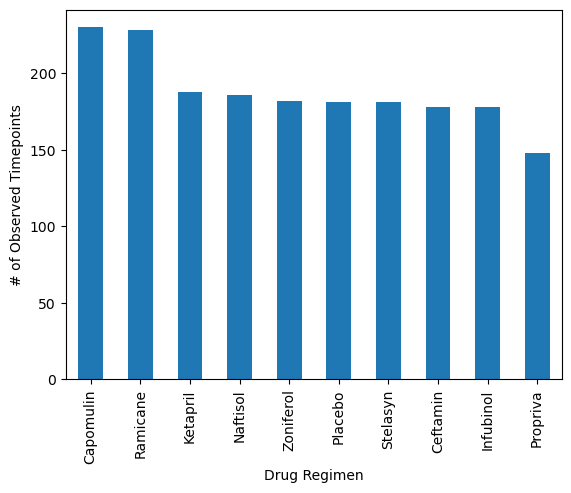

In [8]:
#BAR using Pandas
drug_count = clean_data.groupby('Drug Regimen').size()
drug_counts = drug_count.sort_values(ascending=False)
drug_counts.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.show()

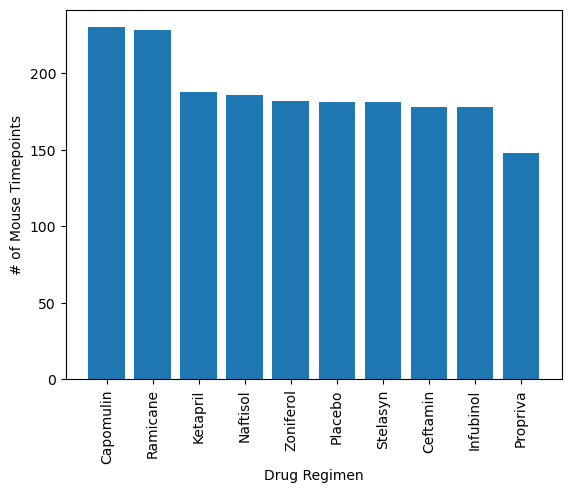

<Figure size 2000x1000 with 0 Axes>

In [9]:
#BAR using Matplotlib
plt.bar(drug_counts.index,drug_counts)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Mouse Timepoints")
plt.figure(figsize=(20,10))
plt.show()

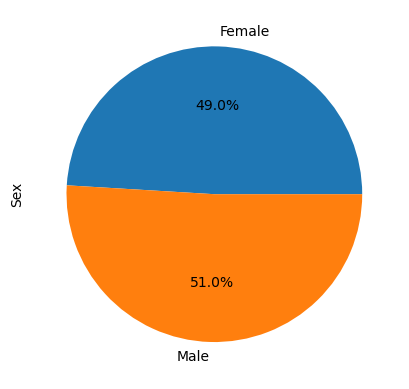

In [10]:
#PIE using Pandas
mice_gen = clean_data.groupby('Sex').size()
mice_gen.plot(kind = 'pie',autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

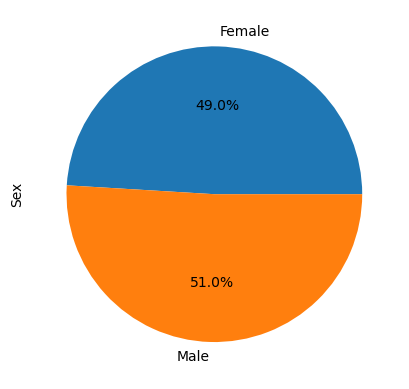

In [11]:
#PIE using Matplotlib
plt.pie(mice_gen, autopct = "%1.1f%%", labels = mice_gen.index)
plt.ylabel("Sex")
plt.show()

In [12]:
#QUARTILES, OUTLIERS, AND BOXPLOTS

In [13]:
last_tp = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
#Merges with the cleaned data
new_data = pd.merge(clean_data,last_tp, on = ['Mouse ID','Timepoint'], how = 'right')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty dictionary to store potential outliers for each treatment
potential_outliers = {}

# Iterate over each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = new_data[new_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Find potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store potential outliers in the dictionary
    potential_outliers[treatment] = outliers

# Display potential outliers for each treatment
for treatment, outliers in potential_outliers.items():
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

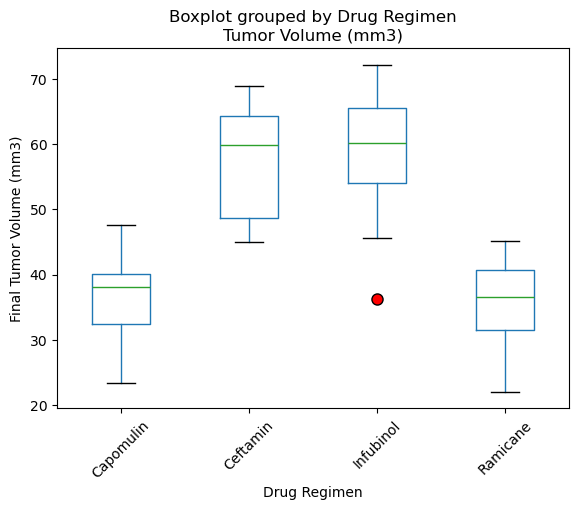

In [15]:
#boxplot
# Filter the data for the four specific treatment regimens
filtered_data = new_data[new_data['Drug Regimen'].isin(treatments)]

# Generate a box plot
plt.figure(figsize=(10, 6))
boxplot = filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', 
                                flierprops=dict(marker='o', markerfacecolor='r', markersize=8), grid = False)

# Set plot labels
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()

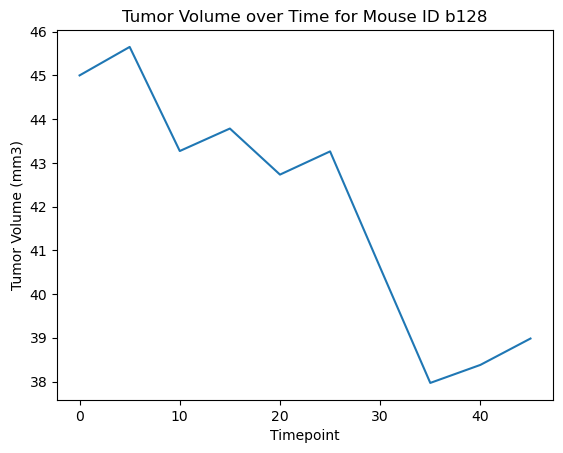

In [16]:
# Filter the data for Mouse ID 'b128'
mouse_b128_data = clean_data[clean_data['Mouse ID'] == 'b128']

# Create a line plot
plt.plot(mouse_b128_data['Timepoint'], mouse_b128_data['Tumor Volume (mm3)'], linestyle='-')

# Set plot title and labels
plt.title('Tumor Volume over Time for Mouse ID b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(False)
plt.show()

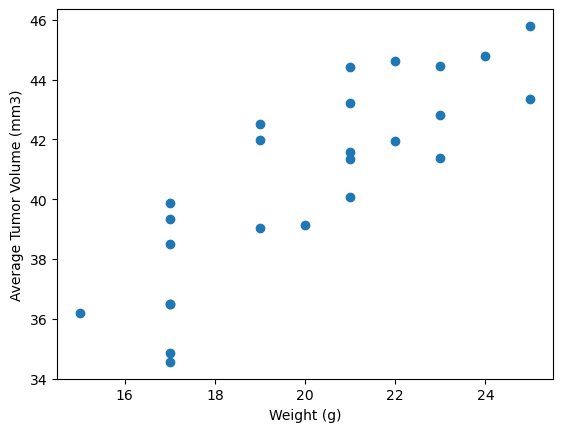

In [17]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Convert the weight data to a flat list
mouse_weight = [weight[0] for weight in mouse_weight]

# Generate a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o')

# Set plot title and labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(False)
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


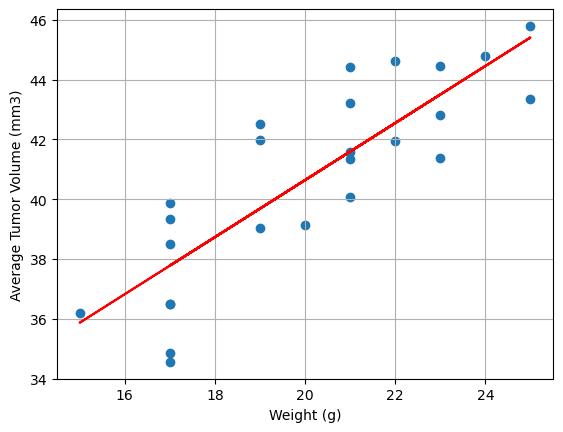

In [18]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Convert the weight data to a flat list
mouse_weight = [weight[0] for weight in mouse_weight]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_volume)

# Calculate the regression line
regression_line = [slope * weight + intercept for weight in mouse_weight]

# Generate a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o')

# Plot the regression line
plt.plot(mouse_weight, regression_line, color='r')

# Set plot title and labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation coefficient
correlation_coefficient = rvalue

# Print correlation coefficient
print('The correlation between mouse weight and the average tumor volume is {:.2f}'.format(correlation_coefficient))

# Show the plot
plt.grid(True)
plt.show()
